# Introduction to using Colab for data visualization.

## First steps with Colab.

### Introduction

Welcome to this introduction machine learning using Google Colab, and other relevant data analysis and machine learning tools.

You are currently browsing a Colab *notebook*: a format mixing code, text and data visualization, and an increasingly popular tool among researchers, data analysts and machine learning enthusiasts.

If you are **already familiar with Python and notebooks** such as Colab, Jupyter or Google DataLab, you should [start with the main notebook](https://drive.google.com/file/d/1MWGhLyhIGtQyApqDs34ys7tT5ZdjlUaT/view?usp=sharing) instead.

This notebook is a brief introduction to Colab, and how it can be used to load, process, analyze and visualize data.

### Notebooks and cells

Documents in Colab are called *notebooks*, as they are similar paper notebooks and scrapbooks where formulas, notes, plots and images coexist.
Colab notebooks are based on Jupyter Notebook, with additional custom features that make them easier to integrate with other Google Cloud tools. Similar tools include RStudio and Zeppelin.

Notebooks are made of two main types of cells:

- **Markdown** cells are formatted blocks of text (including images, hyperlinks, ...).
- **Code** cells include executable Python code, which can be run dynamically and render a result (text, plot, interactive form, ...).

A Markdown cell can be placed in Edit mode by selecting it and pressing the `Enter` key, or simply double-clicking on the cell. Code cells are always in edit mode. In this mode, the cell's content is edited similarly to how one would edit a paragraph in Word or code in a text editor, with helpful features such as syntax highlighting, autocompletion and documentation widgets.

Cells can be executed by pressing `Shift+Enter`. This triggers the Markdown cells to be rendered to HTML, and the Code cells to run the code they contain, and show any output generated by this code (more on this below).

This mix of Markdown and code cells is truly powerful, allowing you to build elaborate and well documented reports and prototypes that can be easily shared and modified.

### Markdown cells

*Markdown* is a human readable syntax for structured text. It is widely used on the web to build structured text using a simple input, without additional UI elements.

It supports the most common formatting needs:

- **Bold**, *italic* and `monospaced` text.

- Hyperlinks: [Google.com](https://google.com)
- Lists such as this one...
    * ...possibly with more...
        - ...than just one level.
- Formulas (using the $\LaTeX$ format and `MathJax`):
$$f_i(x) = \frac{e^{x_i}}{\sum_{n: 0 \to N}{e^{x_n}}}$$
- Quotes:

> Q-learning can be overoptimistic in large-scale problems, even if these are deterministic, due to the inherent estimation errors of learning.
>
> *van Hasselt et al., 2015*


These cells are usually used as a supplement to code cells, providing context, but can also be used as the main medium, with code being only used to fetch and display data.

### Code cells

#### Basics

Code cells are blocks of executable Python code. We can reason about these cells as mini-programs that have a shared state and can be executed in an arbitrary order.


When editing these cells, a number of features common in code editors are present:
- Code highlighting: highlights different reserved keywords, literals, ...
- Auto-completion: by pressing `Tab` after writing part of a symbol's name.
- Documentation: by pressing `Shift + Tab` after a symbol, or adding a `?` after a symbol and running the cell.

Below is a simple example of a code cell:

In [0]:
print("Hello world")

Hello world


When this cell is executed (by pressing `Shift + Enter`), its content is sent to the server hosting the notebook for execution, and the output (if any) is displayed below the cell.
The example above is simplistic, but any arbitrary Python code (including import statements, IO and heavy calculations) can be executed in this manner.

Here a couple of slightly more elaborate examples:

In [0]:
age = dict(Bill=15, Joey=22)
age['Joey']  

22

In [0]:
factor = 3
values = [1, 12, 42, 82, 33]
for value in values:
    if value % factor == 0:
        print(value)

12
42
33


#### Data visualization

Cell output is not restricted to printing text, and these cells are commonly used to visualize data through different means: plots, maps or even take user input via interactive forms.

The cells below show how `matplotlib`, a popular data visualization library, can be used to display plots in Colab.

Note that `%matplotlib inline` in the first cell is called a `magic`, and simply configures this notebook to display plots generated by matplotlib without the need to explicitely call the `show()` method. The other lines import matplotlib and configure the style of the plots.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(8, 6))

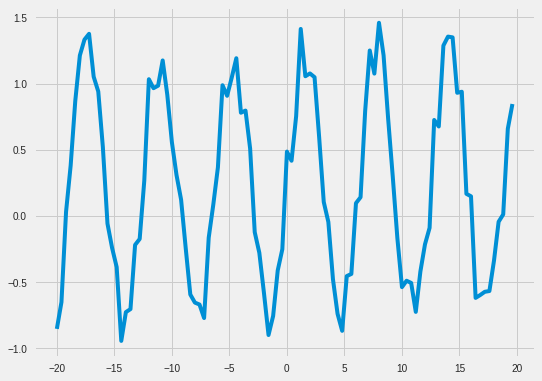

In [0]:
import numpy as np

X = np.arange(start=-20, stop=20, step=0.4)
y = np.sin(X) + np.random.rand(len(X)) * 0.5
plt.plot(X, y)

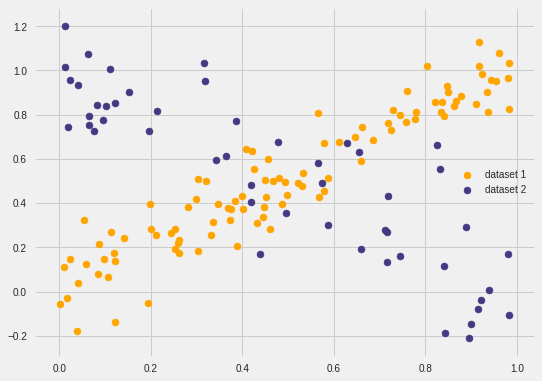

In [0]:
X1 = np.random.sample(100)
X2 = np.random.sample(50)
y1 = np.random.normal(X1, scale=0.1)
y2 = - np.random.normal(X2, scale=0.2) + 1

plt.scatter(X1, y1, color='orange', label='dataset 1')
plt.scatter(X2, y2, color=[0.267968, 0.223549, 0.512008], label='dataset 2')
plt.legend()

For more advanced plotting needs, you can also use other libraries such as `seaborn`, to make a violin plot (useful to visualize the distribution of many variables):

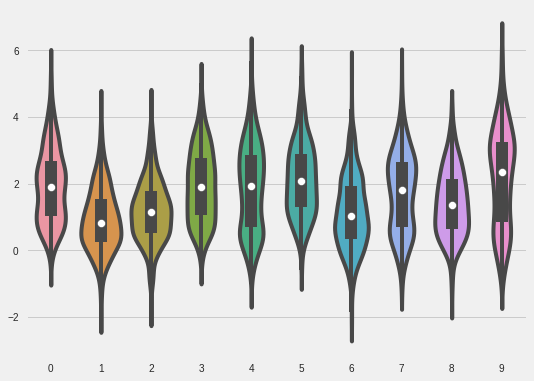

In [0]:
import seaborn as sns

variables = [np.append(np.random.normal(loc=np.random.rand(), scale=0.5, size=200), np.random.normal(loc=1.0 + np.random.rand()*2.0, scale=1.0, size=500))
             for _ in range(10)]
sns.violinplot(data=variables)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


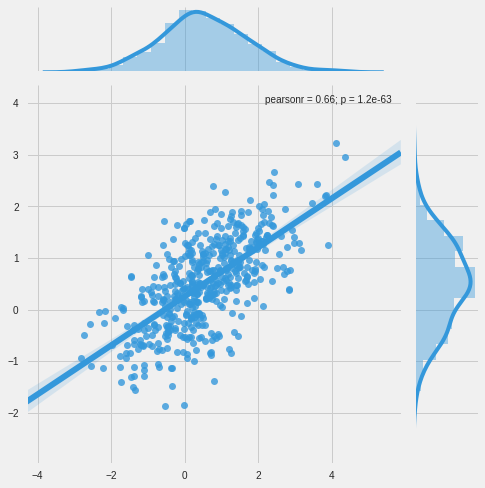

In [0]:
cov= np.array([[1, 0.3],
               [1.2, 1]])
data = np.random.multivariate_normal(mean=(0.5, 0.5), cov=cov, size=500)
sns.jointplot(x=data[:,0], y=data[:,1], kind='reg', color="#3498db", size=7)

### Tabular data

It is extremely common to deal with tabular data: data structured as a series of rows and columns, similar to what is used in spreadsheet software. This data is often saved as a `CSV` file, but can also be imported from other formats (`JSON`, `xls`, or Google BigQuery).

`pandas` is a Python library that allows you to perform various types of operations on tabular data, organized in tables called `DataFrame`s. Let's explore some common operations possible with this library:

First, we will create a dataframe from a series of entries. Note that you can also use `load_csv`, `load_json`... to read data from disk.

In [0]:
import pandas as pd 

year = [2015, 2016, 2017, 2015, 2016, 2017, 2015, 2016, 2017, 2015, 2016, 2017]
country = ['US', 'US', 'US', 'UK', 'UK', 'UK', 'FR', 'FR', 'FR', 'IT', 'IT', 'IT'] 
sales = [81, 89, 121, 55, 65, 82, 11, 25, 16, 30, 21, 42]
data = dict(year=year, country=country, sales=sales)
sales_df = pd.DataFrame(data)

We can visualize a summary of our dataframe by simpling returning it, or calling `head` to get some of its first values:

In [0]:
sales_df

,country,sales,year
0,US,81,2015
1,US,89,2016
2,US,121,2017
3,UK,55,2015
4,UK,65,2016
5,UK,82,2017
6,FR,11,2015
7,FR,25,2016
8,FR,16,2017
9,IT,30,2015


You can query a `pandas` dataframe in the same way you query a database system, filtering rows, grouping by a field and/or sorting by values:

In [0]:
sales_df.groupby('country').sales.mean()

country
FR    17.333333
IT    31.000000
UK    67.333333
US    97.000000
Name: sales, dtype: float64

In [0]:
sales_df.sort_values(['year', 'sales'])

,country,sales,year
6,FR,11,2015
9,IT,30,2015
3,UK,55,2015
0,US,81,2015
10,IT,21,2016
7,FR,25,2016
4,UK,65,2016
1,US,89,2016
8,FR,16,2017
11,IT,42,2017


In [0]:
sales_df[(sales_df.sales < 90) & ~sales_df.country.isin(['FR', 'UK'])]

,country,sales,year
0,US,81,2015
1,US,89,2016
9,IT,30,2015
10,IT,21,2016
11,IT,42,2017


`pandas` also works well with `seaborn`, so you can easily visualize data stored in dataframes. Let's show the evolution of sales for each country:

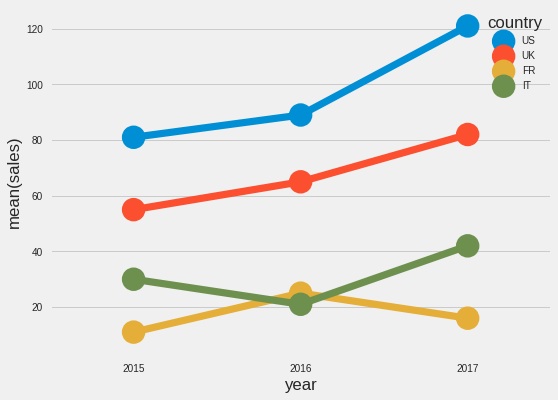

In [0]:
sns.pointplot(data=sales_df, x='year', y='sales', hue='country')

We can also see how much sales are changing for each country:

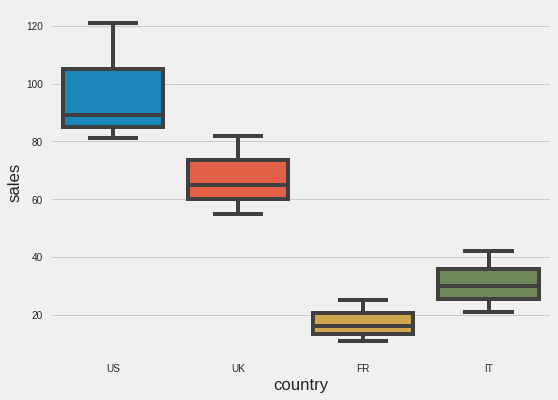

In [0]:
sns.boxplot(data=sales_df, x='country', y='sales')